# Project 2 Machine learning # 

The following project contains our methods implemented for COMP30027 IMDb movie prediction. It is organised by 

It should be fully executable from top to bottom. For further instructions see readme.txt.

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

### Pre Processing ###

First we will look at the data, then decide what to do with certain categories.

Everything we do to the test set we also do to the training set, but only based on what we've seen in the test set.

One key theme is that many of the models we have learned involve / assume linear data, so many of the numeric things we will have to linearise / take the log of

In [231]:
test_dataset = pd.read_csv('test_dataset.csv')
train_dataset = pd.read_csv('train_dataset.csv')

train_X = train_dataset.drop(columns=['imdb_score_binned'])
train_y = train_dataset['imdb_score_binned']

pd.set_option('display.max_columns', None)

In [232]:
train_y.value_counts()

imdb_score_binned
2    1839
3     777
1     235
4     129
0      24
Name: count, dtype: int64

For the ones where it is 0, what do they have in common. This is a hard class to classify

In [233]:
zeros_df = train_dataset[train_dataset['imdb_score_binned'] == 0]
zeros_df.describe()

,id,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,imdb_score_binned
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,2.400000e+01,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0
mean,1340.333333,74.125000,95.166667,143.416667,308.375000,787.791667,1.398697e+07,27364.708333,2110.958333,1.00000,273.458333,2002.708333,443.208333,3000.958333,0.000779,0.0
std,883.772677,50.053287,11.343133,242.636589,235.265772,523.367273,1.645435e+07,23190.334639,1439.219096,1.47442,286.508818,6.003471,260.326881,12575.795079,0.000423,0.0
min,25.000000,12.000000,76.000000,0.000000,0.000000,117.000000,3.067150e+05,2724.000000,286.000000,0.00000,28.000000,1986.000000,12.000000,0.000000,0.000300,0.0
25%,453.000000,30.250000,88.750000,15.000000,94.500000,565.500000,4.917834e+06,7495.000000,1068.000000,0.00000,62.000000,2000.750000,275.000000,0.000000,0.000525,0.0
50%,1530.000000,59.000000,94.500000,70.000000,244.000000,739.500000,8.246158e+06,20905.500000,1927.000000,0.00000,200.500000,2004.500000,412.000000,301.000000,0.000600,0.0
75%,2077.000000,115.750000,98.250000,115.750000,454.500000,902.250000,1.750562e+07,40968.250000,2786.500000,2.00000,391.750000,2006.000000,624.000000,813.750000,0.000976,0.0
max,2610.000000,174.000000,121.000000,892.000000,782.000000,3000.000000,7.300094e+07,74945.000000,6539.000000,6.00000,1308.000000,2011.000000,869.000000,62000.000000,0.002251,0.0


In [234]:
zeros_df

,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality,imdb_score_binned
24,25,Dave Borthwick,31,77,3,593,Kylie Minogue,787,7382993,Adventure|Animation|Comedy|Family|Fantasy,Jimmy Fallon,Doogal,3851,2185,Jon Stewart,0,diamond|lava|magic|mountain|sorcerer,114,English,USA,G,2006,690,346,[-2.83997180e-03 3.62726132e-05 2.84734019e-...,0.000600,0
71,72,Steve Gomer,24,76,9,47,Kyla Pratt,595,11144518,Adventure|Family,Trevor Morgan,Barney's Great Adventure,2724,1139,Shirley Douglas,0,apostrophe in title|critically bashed|hit on t...,53,English,Canada,G,1998,417,436,[ 3.15951445e-04 7.57367059e-04 -6.76112249e-...,0.000375,0
162,163,Uwe Boll,148,94,892,81,Darren Shahlavi,310,5132655,Horror|Sci-Fi,Catherine Lough Haggquist,Alone in the Dark,37626,838,Karin Konoval,0,artifact|creature|darkness|demon|museum,521,English,Canada,R,2005,294,1000,[-0.00410943 0.00340693 -0.00078941 0.000157...,0.000600,0
331,332,Roger Christian,174,119,64,41,Michael Byrne,743,21471685,Action|Adventure|Sci-Fi,Richard Tyson,Battlefield Earth,65464,971,John Topor,0,alien|bad acting|pulp fiction|resistance fight...,1308,English,USA,PG-13,2000,117,0,[-1.4395472e-03 -8.5001532e-04 8.4308139e-04 ...,0.000450,0
359,360,Alex Zamm,12,95,43,611,Raquel Welch,1000,306715,Comedy,Taylor Negron,Chairman of the Board,5143,5213,Larry Miller,1,box office flop|company|invention|roommate|surfer,62,English,USA,PG-13,1998,788,724,[-3.05216201e-03 2.74869544e-03 -1.58773502e-...,0.000525,0
443,444,Jim Goddard,21,97,3,161,Paul Freeman,400,2315683,Adventure|Crime|Drama|Romance,Victor Wong,Shanghai Surprise,4081,805,Clyde Kusatsu,0,china|missionary|opium|villain|year 1937,28,English,UK,PG-13,1986,193,154,[-7.4637803e-04 2.3084809e-04 5.0306506e-04 ...,0.000600,0
455,456,Preston A. Whitmore II,25,95,17,255,Wayne Brady,592,7009668,Action|Sport,Wesley Jonathan,Crossover,8707,2000,Eva Marcille,6,african american|basketball|basketball movie|c...,36,English,USA,PG-13,2006,378,244,[ 1.34696648e-03 5.84622961e-04 1.19323924e-...,0.000450,0
461,462,Bob Clark,32,88,84,177,Vanessa Angel,650,9109322,Comedy|Family|Sci-Fi,Scott Baio,Superbabies: Baby Geniuses 2,25371,1343,Peter Wingfield,3,computer|good versus evil|mind control|science...,129,English,Germany,PG,2004,384,0,[-2.2005856e-03 7.7630125e-04 -1.6304254e-04 ...,0.000600,0
680,681,Joseph Sargent,80,92,114,434,Mario Van Peebles,912,20763013,Adventure|Horror|Thriller,Judith Barsi,Jaws: The Revenge,30840,2355,Lynn Whitfield,0,banana boat|boat|christmas|sea|shark,383,English,USA,PG-13,1987,535,0,[-3.4544494e-03 1.5026402e-03 -4.5010704e-04 ...,0.000450,0
1138,1139,Lawrence Guterman,78,94,6,227,Traylor Howard,490,17010646,Comedy|Family|Fantasy,Jamie Kennedy,Son of the Mask,40751,1195,Ben Stein,0,baby|cartoon on tv|cartoonist|dog|mask,239,English,USA,PG,2005,294,881,[-3.4722264e-03 1.7927631e-03 -1.5056618e-03 ...,0.000525,0


Later on I will try to synthetically oversample the Zero such that they match at least class 4 which has 129 samples

In [235]:
train_X.describe()

,id,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality
count,3004.00000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3.004000e+03,3.004000e+03,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000
mean,1502.50000,165.609188,110.076565,778.890146,767.860186,7654.935752,5.187733e+07,1.049017e+05,11391.643808,1.380826,335.922770,2002.782956,1992.843209,8972.179427,0.001739
std,867.32443,121.254549,21.910608,2990.741946,1901.991202,16488.761947,6.840156e+07,1.508573e+05,20044.723195,2.093417,415.219466,10.086250,4651.072554,19853.888300,0.001183
min,1.00000,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,1929.000000,0.000000,0.000000,0.000300
25%,751.75000,76.000000,96.000000,10.000000,191.000000,728.500000,8.579684e+06,1.897825e+04,1873.000000,0.000000,108.000000,1999.000000,377.750000,0.000000,0.000825
50%,1502.50000,137.000000,106.000000,62.500000,433.000000,1000.000000,3.020586e+07,5.387400e+04,3889.000000,1.000000,208.000000,2004.000000,664.000000,241.000000,0.001426
75%,2253.25000,223.000000,120.000000,234.000000,683.000000,12000.000000,6.647359e+07,1.284895e+05,15925.250000,2.000000,398.000000,2010.000000,970.000000,11000.000000,0.002401
max,3004.00000,813.000000,330.000000,23000.000000,23000.000000,640000.000000,6.586723e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,197000.000000,0.007354


Handling null values. From Ed it seems this one is the one with language == null

### Null Values ###

In [236]:
train_X.isnull().sum()

id                           0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     1
country                      0
content_rating               0
title_year                   0
actor_2_facebook_likes       0
movie_facebook_likes         0
title_embedding              0
average_degree_centrality    0
dtype: int64

There is no null value in the test dataset, so I will go in to manually fix it

In [237]:
train_X[train_X['language'].isnull()]

,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality
2787,2788,Ron Fricke,115,102,330,0,Balinese Tari Legong Dancers,48,2601847,Documentary|Music,Collin Alfredo St. Dic,Samsara,22457,48,Puti Sri Candra Dewi,0,hall of mirrors|mont saint michel france|palac...,69,NaN,USA,PG-13,2011,0,26000,[-1.7939140e-04 1.7596362e-03 -8.5148757e-05 ...,0.0003


### Language ###

In [238]:
train_X['language'].value_counts()

language
English       2872
French          32
Spanish         19
Mandarin         9
Japanese         9
German           9
Italian          5
Cantonese        5
Korean           4
Portuguese       4
Hindi            3
Norwegian        3
Dutch            3
Danish           3
Aboriginal       2
Thai             2
Indonesian       2
Dari             2
Persian          2
Kazakh           1
Maya             1
Aramaic          1
Filipino         1
Bosnian          1
Czech            1
Zulu             1
Vietnamese       1
Hungarian        1
Hebrew           1
Mongolian        1
Romanian         1
Arabic           1
Name: count, dtype: int64

Some research online reveals it is shot in 25 countries, that is why the language is hard to define. However, each language and other having its own category might really be useless, especially considering the fact that there aren't many non-english films anyway (e.g. a single category for 'Norwegian' would be useless). Instead I will create a category for English or Non-English. Assuming the test data is distributed similarly, individual categories for each language wouldn't make much sense either

In [239]:
train_X['English'] = train_X['language'].map(lambda x: 1 if (x == 'English') else 0)
test_dataset['English'] = test_dataset['language'].map(lambda x: 1 if (x == 'English') else 0)

### Country ###

In [240]:
train_X['country'].value_counts()

country
USA               2382
UK                 255
France              86
Germany             61
Canada              46
Australia           32
Spain               21
Japan               12
New Zealand         10
China                9
Hong Kong            9
Italy                8
South Korea          7
Ireland              6
Mexico               6
Denmark              6
Brazil               4
Thailand             3
South Africa         3
Argentina            3
Iran                 3
Netherlands          3
India                3
Norway               3
Taiwan               2
Czech Republic       2
Russia               2
Romania              2
Hungary              2
Colombia             1
Israel               1
West Germany         1
Official site        1
Afghanistan          1
Aruba                1
Chile                1
Finland              1
Iceland              1
Poland               1
Belgium              1
New Line             1
Indonesia            1
Name: count, dtype: int64

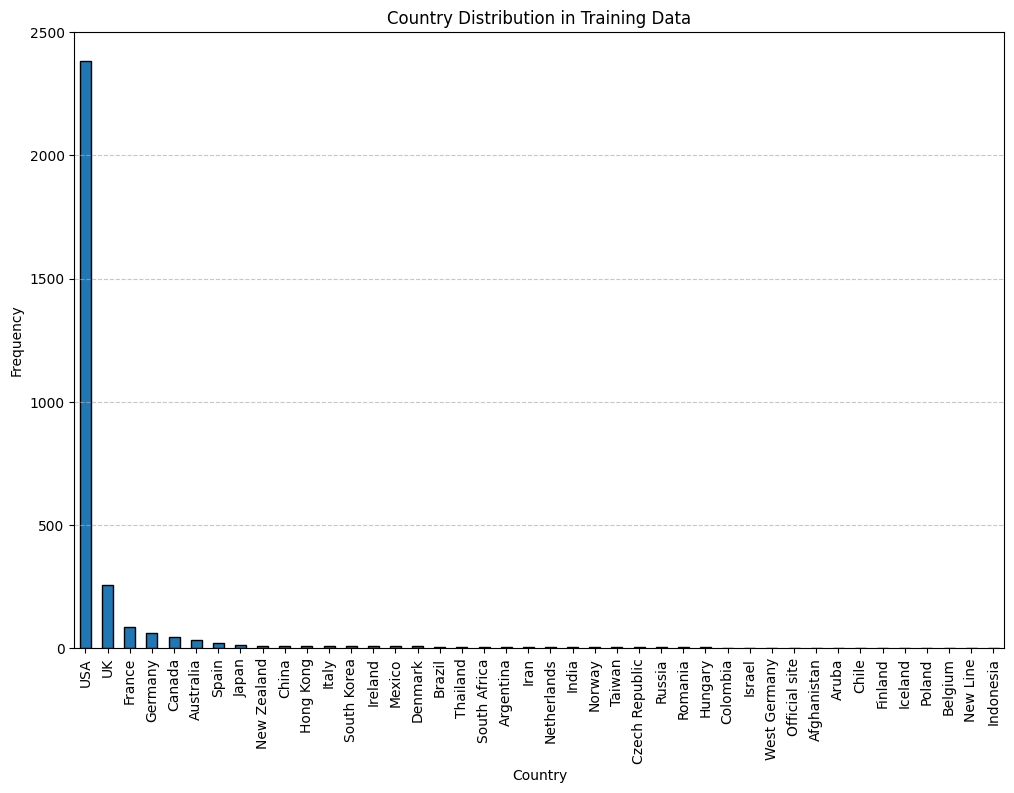

In [241]:
country_counts = train_X['country'].value_counts()

plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', edgecolor='black')
plt.title('Country Distribution in Training Data')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

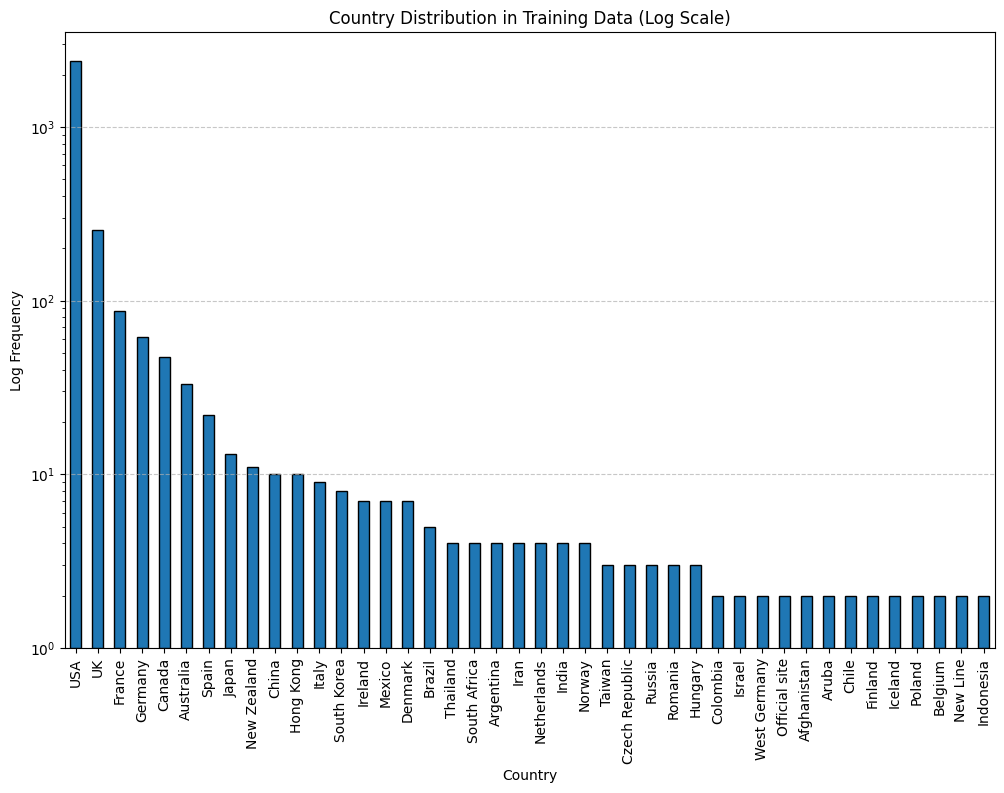

In [462]:
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', edgecolor='black', log=True)
plt.title('Country Distribution in Training Data (Log Scale)')
plt.xlabel('Country')
plt.ylabel('Log Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [242]:
countries = ['USA', 'UK']

for country in countries:
    train_X[country] = train_X['country'].map(lambda x: 1 if (x == country) else 0)
    test_dataset[country] = test_dataset['country'].map(lambda x: 1 if (x == country) else 0)

### Content Rating ###

In [243]:
train_X['content_rating'].value_counts()

content_rating
R            1362
PG-13        1039
PG            458
G              68
Not Rated      27
Unrated        19
Approved       14
X               9
NC-17           3
M               2
Passed          2
GP              1
Name: count, dtype: int64

I will join Not Rated and Unrated into their own category.

After some research online:

https://rating-system.fandom.com/wiki/GP PG replaced GP, and GP replaced M, hence we can group these into the same rating (using PG).

https://movies.stackexchange.com/questions/65430/what-are-the-meanings-of-the-terms-passed-and-approved-with-regards-to-a-mov
Approved and passed seem to be the same too 

https://rating-system.fandom.com/wiki/X_(MPAA) and X was replaced by NC-17

In [244]:
train_X['content_rating'] = train_X['content_rating'].map(lambda x: 'PG' if (x == 'GP' or x == 'M') else x)
train_X['content_rating'] = train_X['content_rating'].map(lambda x: 'Unrated' if (x == 'Not Rated' or x == 'Passed' or x == 'Approved') else x)
train_X['content_rating'] = train_X['content_rating'].map(lambda x: 'NC-17' if (x == 'X') else x)

test_dataset['content_rating'] = test_dataset['content_rating'].map(lambda x: 'PG' if (x == 'GP' or x == 'M') else x)
test_dataset['content_rating'] = test_dataset['content_rating'].map(lambda x: 'Unrated' if (x == 'Not Rated' or x == 'Passed' or x == 'Approved') else x)
test_dataset['content_rating'] = test_dataset['content_rating'].map(lambda x: 'NC-17' if (x == 'X') else x)

now one hot encode them

In [245]:
ratings = list(train_X['content_rating'].unique())

for rating in ratings:
    train_X[rating] = train_X['content_rating'].map(lambda x: 1 if (x == rating) else 0)
    test_dataset[rating] = test_dataset['content_rating'].map(lambda x: 1 if (x == rating) else 0)

### Director Degree Centrality ###

Similar to average_degree_centrality which measures the centrality of the film based on shared actors, we will create a new feature: director degree centrality. 

More specifically:

$$director\_degree\_centrality = (number\_of\_movies\_by\_director - 1) / (number\_of\_movies\_in\_the\_training\_set - 1)$$

We subtract 1 from the numerator to NOT count the self-connection. The denominator is adjsuted by 1 because the maximum possible connections without a self connection is now one less.

In [246]:
director_counts_dict = train_X['director_name'].value_counts().to_dict()
number_of_movies = train_X.shape[0]

train_X['director_degree_centrality'] = train_X['director_name'].map(lambda x: (director_counts_dict.get(x) - 1) / (number_of_movies - 1))
test_dataset['director_degree_centrality'] = test_dataset['director_name'].map(lambda x: max(0, (director_counts_dict.get(x, 0) - 1) / (number_of_movies - 1)))

### importing pre-processed features ###

These come with MANY (100) dimensions, so we will have to apply some dimensionality reduction techniques on them

We have chosen NOT to use the one hot encoded actors, because the feature average degree centrality already uses this. We also don't include the directors because it's used in director centrality

In [247]:
test_countvec_features_actor_1_name_df = pd.DataFrame(np.load('features_countvec/test_countvec_features_actor_1_name.npy'))

train_countvec_features_actor_1_name_df = pd.DataFrame(np.load('features_countvec/train_countvec_features_actor_1_name.npy'))

test_countvec_features_actor_2_name_df = pd.DataFrame(np.load('features_countvec/test_countvec_features_actor_2_name.npy'))

train_countvec_features_actor_2_name_df = pd.DataFrame(np.load('features_countvec/train_countvec_features_actor_2_name.npy'))

test_countvec_features_director_name_df = pd.DataFrame(np.load('features_countvec/test_countvec_features_actor_2_name.npy'))

train_countvec_features_director_name_df = pd.DataFrame(np.load('features_countvec/train_countvec_features_director_name.npy'))

test_doc2vec_features_genre_df = pd.DataFrame(np.load('features_doc2vec/test_doc2vec_features_genre.npy'))
test_doc2vec_features_genre_df = test_doc2vec_features_genre_df.rename(columns={i: f"genre_vec_{i}" for i in  range(100)})

train_doc2vec_features_genre_df = pd.DataFrame(np.load('features_doc2vec/train_doc2vec_features_genre.npy'))
train_doc2vec_features_genre_df = train_doc2vec_features_genre_df.rename(columns={i: f"genre_vec_{i}" for i in  range(100)})

test_doc2vec_features_plot_keywords_df = pd.DataFrame(np.load('features_doc2vec/test_doc2vec_features_plot_keywords.npy'))
test_doc2vec_features_plot_keywords_df = test_doc2vec_features_plot_keywords_df.rename(columns={i: f"plot_keywords_vec_{i}" for i in  range(100)})

train_doc2vec_features_plot_keywords_df = pd.DataFrame(np.load('features_doc2vec/train_doc2vec_features_plot_keywords.npy'))
train_doc2vec_features_plot_keywords_df = train_doc2vec_features_plot_keywords_df.rename(columns={i: f"plot_keywords_vec_{i}" for i in  range(100)})

test_fasttext_title_embeddings_df = pd.DataFrame(np.load('features_fasttext/test_fasttext_title_embeddings.npy'))
test_fasttext_title_embeddings_df = test_fasttext_title_embeddings_df.rename(columns={i: f"test_fasttext_title_vec_{i}" for i in  range(100)})

train_fasttext_title_embeddings_df = pd.DataFrame(np.load('features_fasttext/train_fasttext_title_embeddings.npy'))
train_fasttext_title_embeddings_df = train_fasttext_title_embeddings_df.rename(columns={i: f"test_fasttext_title_vec_{i}" for i in  range(100)})

First I will try PCA dimensionality reduction to 3 dimensions. Later on, if the model fails to predict 0 as before, I will try finding the ones that have the highest correlation with score 0

### Dropping irrelevant columns ###

We can now drop all irrelevant columns that we have already processed into new columns or don't need.

In [248]:
train_X = train_X.drop(columns = ['id', 'director_name', 'actor_1_name', 'actor_2_name' , 'actor_3_name', 'genres', 'movie_title', 'plot_keywords', 'language', 'country', 'content_rating', 'title_embedding'])
test_dataset = test_dataset.drop(columns = ['id', 'director_name', 'actor_1_name', 'actor_2_name' , 'actor_3_name', 'genres', 'movie_title', 'plot_keywords', 'language', 'country', 'content_rating', 'title_embedding'])

### JOINING ###

In [249]:
train_X_joined = pd.concat([train_X, train_doc2vec_features_genre_df, train_doc2vec_features_plot_keywords_df,train_fasttext_title_embeddings_df], axis=1)
test_X_joined = pd.concat([test_dataset, test_doc2vec_features_genre_df, test_doc2vec_features_plot_keywords_df,test_fasttext_title_embeddings_df], axis=1)

Then also do it with the original fetures provided, to see if PCA makes a difference

In [250]:
test_countvec_features_actor_1_name_df = pd.DataFrame(np.load('features_countvec/test_countvec_features_actor_1_name.npy'))

train_countvec_features_actor_1_name_df = pd.DataFrame(np.load('features_countvec/train_countvec_features_actor_1_name.npy'))

test_countvec_features_actor_2_name_df = pd.DataFrame(np.load('features_countvec/test_countvec_features_actor_2_name.npy'))

train_countvec_features_actor_2_name_df = pd.DataFrame(np.load('features_countvec/train_countvec_features_actor_2_name.npy'))

test_countvec_features_director_name_df = pd.DataFrame(np.load('features_countvec/test_countvec_features_actor_2_name.npy'))

train_countvec_features_director_name_df = pd.DataFrame(np.load('features_countvec/train_countvec_features_director_name.npy'))

test_doc2vec_features_genre_df = pd.DataFrame(np.load('features_doc2vec/test_doc2vec_features_genre.npy'))
test_doc2vec_features_genre_df = test_doc2vec_features_genre_df.rename(columns={i: f"genre_vec_{i}" for i in  range(100)})

train_doc2vec_features_genre_df = pd.DataFrame(np.load('features_doc2vec/train_doc2vec_features_genre.npy'))
train_doc2vec_features_genre_df = train_doc2vec_features_genre_df.rename(columns={i: f"genre_vec_{i}" for i in  range(100)})

test_doc2vec_features_plot_keywords_df = pd.DataFrame(np.load('features_doc2vec/test_doc2vec_features_plot_keywords.npy'))
test_doc2vec_features_plot_keywords_df = test_doc2vec_features_plot_keywords_df.rename(columns={i: f"plot_keywords_vec_{i}" for i in  range(100)})

train_doc2vec_features_plot_keywords_df = pd.DataFrame(np.load('features_doc2vec/train_doc2vec_features_plot_keywords.npy'))
train_doc2vec_features_plot_keywords_df = train_doc2vec_features_plot_keywords_df.rename(columns={i: f"plot_keywords_vec_{i}" for i in  range(100)})

test_fasttext_title_embeddings_df = pd.DataFrame(np.load('features_fasttext/test_fasttext_title_embeddings.npy'))
test_fasttext_title_embeddings_df = test_fasttext_title_embeddings_df.rename(columns={i: f"test_fasttext_title_vec_{i}" for i in  range(100)})

train_fasttext_title_embeddings_df = pd.DataFrame(np.load('features_fasttext/train_fasttext_title_embeddings.npy'))
train_fasttext_title_embeddings_df = train_fasttext_title_embeddings_df.rename(columns={i: f"test_fasttext_title_vec_{i}" for i in  range(100)})

Using KMEANS to cluster genre, plot etc.

In [251]:
to_cluster = [(train_doc2vec_features_genre_df, test_doc2vec_features_genre_df, 'genre'), (train_doc2vec_features_plot_keywords_df, test_doc2vec_features_plot_keywords_df, 'plot_keywords'),(train_fasttext_title_embeddings_df,test_fasttext_title_embeddings_df, 'title')]

In [252]:
from sklearn.cluster import KMeans

new_train_features = pd.DataFrame()
new_test_features = pd.DataFrame()

for train_df, test_df, feature in to_cluster:

    kmeans=KMeans(n_clusters=5, random_state=999)
    kmeans.fit(train_df)

    new_train_features[feature + '_cluster'] = kmeans.labels_
    new_test_features[feature + '_cluster'] = kmeans.predict(test_df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [265]:
train_X_joined_total = pd.concat([train_X, new_train_features], axis=1)
test_X_joined_total = pd.concat([test_dataset, new_test_features], axis=1)

In [266]:
test_X_joined_total

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,English,USA,UK,G,R,PG-13,Unrated,PG,NC-17,director_degree_centrality,genre_cluster,plot_keywords_cluster,title_cluster
0,27,118,14,400,2000,2246000,2302,3384,4,20,2015,769,0,0.000375,1,1,0,0,0,0,0,1,0,0.000000,0,0,4
1,339,141,0,404,749,47307550,104301,1948,4,269,2012,463,28000,0.002176,1,1,0,0,1,0,0,0,0,0.002331,3,0,4
2,78,95,89,388,963,37606,31836,2658,0,90,2009,654,0,0.000900,1,0,0,0,1,0,0,0,0,0.000000,2,0,4
3,226,117,0,818,15000,104054514,200359,16828,0,1009,2002,1000,0,0.003452,1,1,0,0,1,0,0,0,0,0.001665,3,2,3
4,97,104,38,690,801,3447339,29517,2667,7,79,2013,727,0,0.000450,1,1,0,0,1,0,0,0,0,0.000000,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,179,93,0,766,13000,17096053,134458,15716,2,640,1998,933,5000,0.002777,1,1,0,0,1,0,0,0,0,0.001665,3,4,4
748,393,105,335,911,3000,37516013,128629,8281,0,348,2012,3000,98000,0.001801,1,1,0,0,1,0,0,0,0,0.000000,0,1,4
749,55,117,133,249,687,20966644,29610,1665,0,94,1985,443,0,0.001126,1,0,1,0,0,0,1,0,0,0.000333,3,2,3
750,85,72,0,384,3000,47887943,11634,4480,0,58,2003,455,227,0.000825,1,1,0,1,0,0,0,0,0,0.000000,0,1,2


### Removing highly correlated data ###
So we can generalise better

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

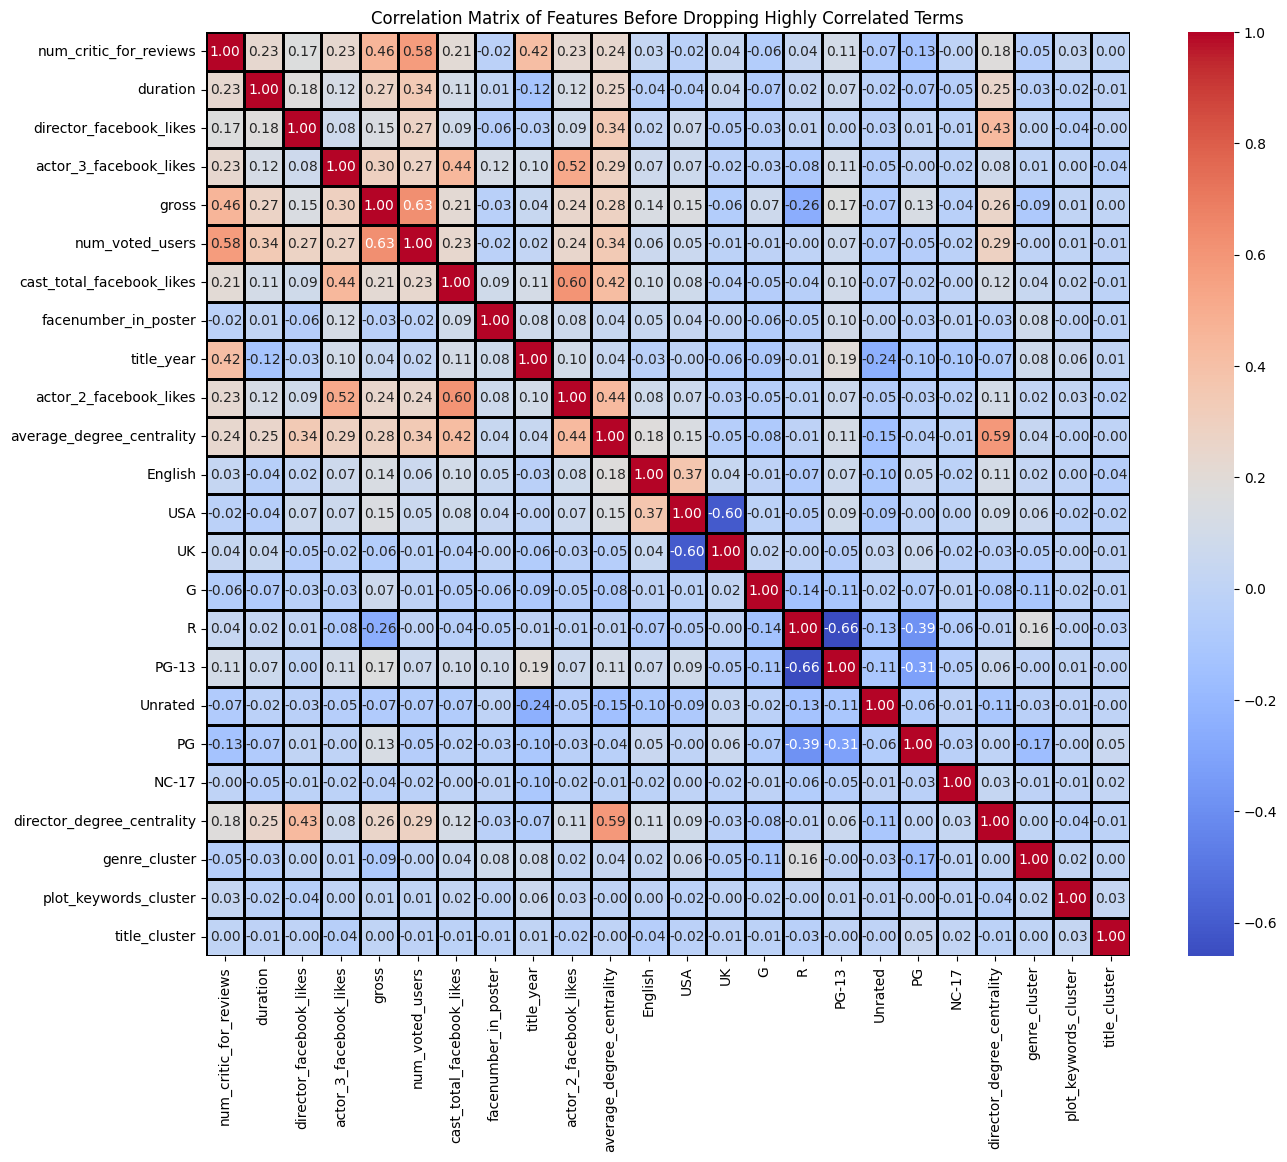

In [461]:
feature_correlations = train_X_joined_total.corr()
plt.figure(figsize=(15,12))
sns.heatmap(feature_correlations, annot=True, fmt=".2f", square=True, cmap="coolwarm",
            annot_kws={"size": 10}, linewidths=1, linecolor='black', cbar=True)
plt.title("Correlation Matrix of Features Before Dropping Highly Correlated Terms")
plt.show()

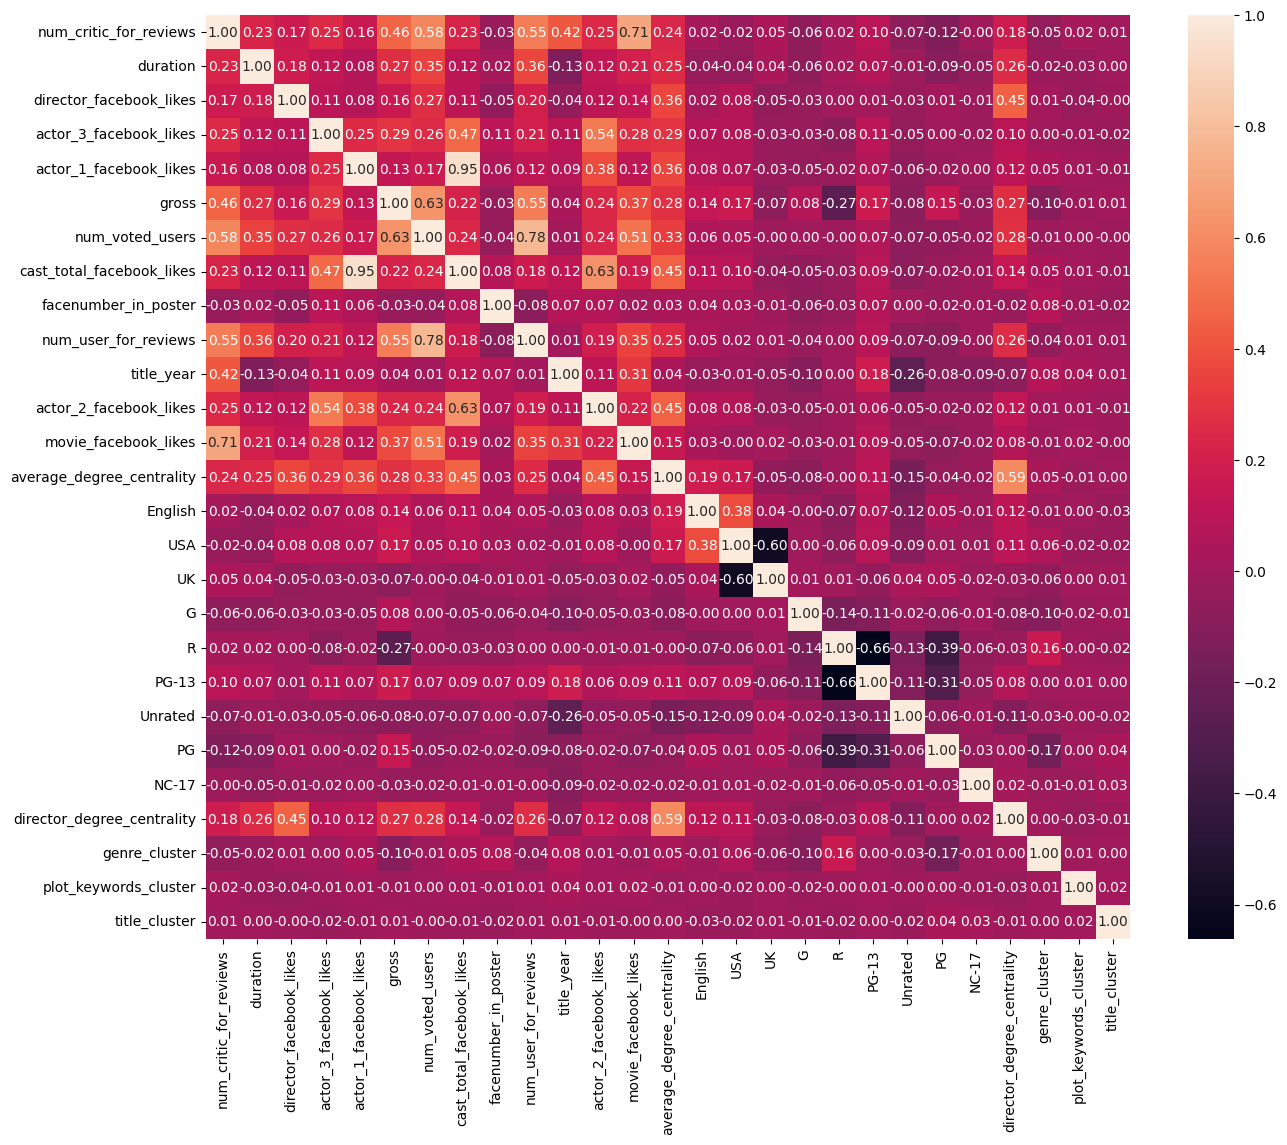

In [268]:
feature_correlations = train_X_joined_total.corr()
plt.figure(figsize=(15,12))
sns.heatmap(feature_correlations, annot=True, fmt=".2f", square=True)
plt.show()

In [269]:
data = pd.concat([train_X_joined_total, train_y], axis=1)
correlations = data[['num_voted_users', 'num_user_for_reviews', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'num_critic_for_reviews', 'movie_facebook_likes', 'imdb_score_binned']].corr()
correlations


,num_voted_users,num_user_for_reviews,actor_1_facebook_likes,cast_total_facebook_likes,num_critic_for_reviews,movie_facebook_likes,imdb_score_binned
num_voted_users,1.000000,0.776031,0.169961,0.237016,0.580511,0.506980,0.524271
num_user_for_reviews,0.776031,1.000000,0.118296,0.175350,0.547682,0.349799,0.346908
actor_1_facebook_likes,0.169961,0.118296,1.000000,0.948486,0.156197,0.123188,0.079192
cast_total_facebook_likes,0.237016,0.175350,0.948486,1.000000,0.225191,0.194528,0.090961
num_critic_for_reviews,0.580511,0.547682,0.156197,0.225191,1.000000,0.706790,0.323469
movie_facebook_likes,0.506980,0.349799,0.123188,0.194528,0.706790,1.000000,0.296957
imdb_score_binned,0.524271,0.346908,0.079192,0.090961,0.323469,0.296957,1.000000


Based on these correlations we should drop the following:

drop num_user_for_review (0.52 > 0.37)

drop actor_1_facebook_likes (0.08 < 0.09)

drop movie facebook likes (0.32 > 0.30)

In [271]:
train_X_joined_total = train_X_joined_total.drop(columns=['num_user_for_reviews', 'actor_1_facebook_likes', 'movie_facebook_likes'])
test_X_joined_total = test_X_joined_total.drop(columns=['num_user_for_reviews', 'actor_1_facebook_likes', 'movie_facebook_likes'])

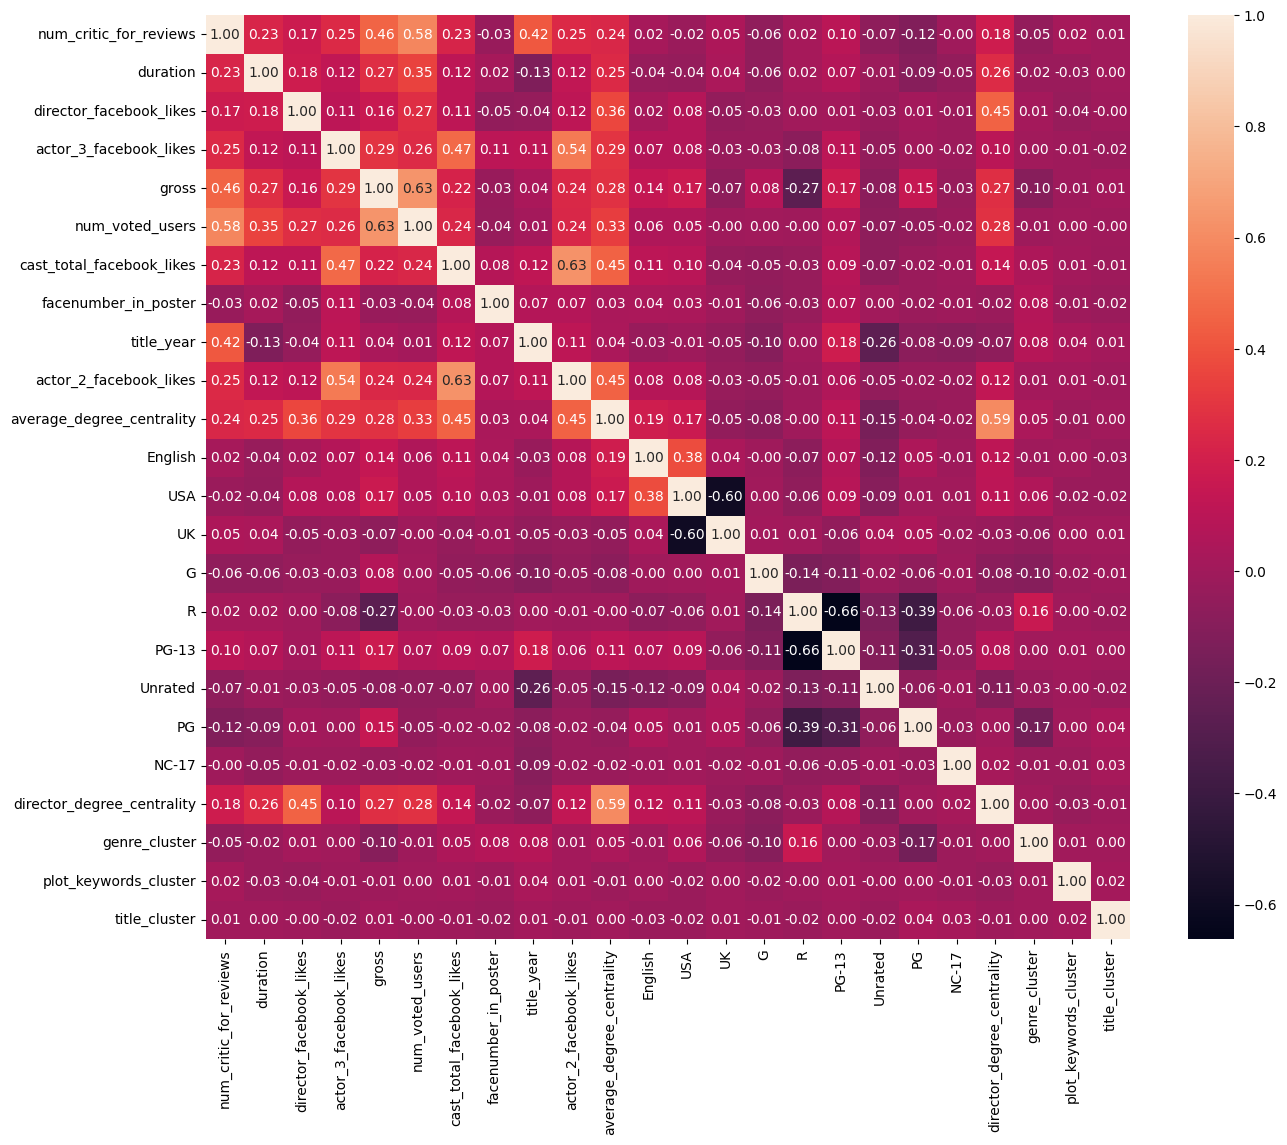

In [272]:

feature_correlations = train_X_joined_total.corr()
plt.figure(figsize=(15,12))
sns.heatmap(feature_correlations, annot=True, fmt=".2f", square=True)
plt.show()

There are no longer any SUPER highly correlated features!

### SMOTE for class 0 ###

Because we don't have enough samples for class 0, I will synthetically oversample them. My choice is to make it the SAME as the next smallest class. I will also base this in the 5 nearest neighbours

Now is the time I will do an 80 / 20 test train split. The reason for this is: I do not want to be adding in synthetic samples into the dataset that I test on. I can then re-run a go with and without the increased samples of 0.

In [274]:
train_X_joined_total, X_holdout, train_y, y_holdout = train_test_split(train_X_joined_total, train_y, test_size=0.2, random_state=99)

In [279]:
train_y.value_counts()

imdb_score_binned
2    1458
3     640
1     189
4      99
0      17
Name: count, dtype: int64

In [282]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={0: 99}, k_neighbors=5)

In [283]:
X_smote, y_smote = smote.fit_resample(train_X_joined_total, train_y)

In [284]:
y_smote.value_counts()

imdb_score_binned
2    1458
3     640
1     189
4      99
0      99
Name: count, dtype: int64

TO visualise this:

the reason we are doing this is because there are not enough class 0 to actually predict on

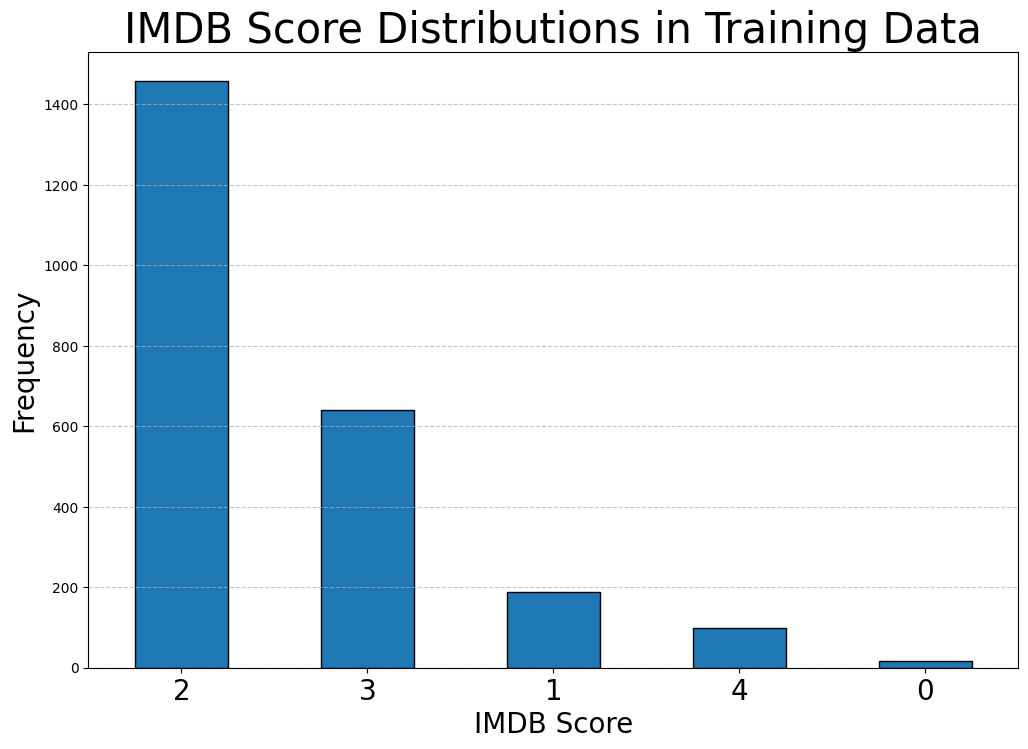

In [458]:
score_counts = train_y.value_counts()

plt.figure(figsize=(12, 8))
score_counts.plot(kind='bar', edgecolor='black')
plt.title('IMDB Score Distributions in Training Data', fontsize=30)
plt.xlabel('IMDB Score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [285]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.model_selection import GridSearchCV

Just for some analysis, we can look at the averages of the class 0 for the heldout section and the non-heldout SMOTE section

In [346]:
joined_smote = pd.concat([X_smote, y_smote], axis=1)
joined_heldout = pd.concat([X_holdout, y_holdout], axis=1)

In [354]:
describe_smote = joined_smote[joined_smote['imdb_score_binned'] == 0].describe().transpose().round(2)

In [356]:
describe_smote

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,99.0,55.92,36.15,12.0,28.5,43.0,77.0,174.0
duration,99.0,94.78,9.10,76.0,89.5,94.0,98.0,119.0
director_facebook_likes,99.0,102.00,151.66,2.0,29.0,57.0,98.0,892.0
actor_3_facebook_likes,99.0,270.09,172.18,0.0,159.0,227.0,384.5,782.0
gross,99.0,12485915.71,17073016.14,306715.0,3479096.5,7043662.0,10562470.5,73000942.0
num_voted_users,99.0,23419.23,20443.79,2724.0,8632.5,15114.0,30994.0,74351.0
cast_total_facebook_likes,99.0,1874.73,918.82,714.0,1226.0,1671.0,2303.0,5213.0
facenumber_in_poster,99.0,0.89,1.24,0.0,0.0,0.0,1.0,6.0
title_year,99.0,2003.12,4.75,1986.0,2001.0,2004.0,2006.0,2011.0
actor_2_facebook_likes,99.0,380.30,186.54,12.0,222.0,381.0,502.5,842.0


In [355]:
describe_heldout = joined_heldout[joined_heldout['imdb_score_binned'] == 0].describe().transpose().round(2)

In [358]:
comparison = pd.concat([describe_heldout['mean'], describe_smote['mean']], axis =1)

In [359]:
comparison

,mean,mean
num_critic_for_reviews,110.29,55.92
duration,95.29,94.78
director_facebook_likes,225.29,102.00
actor_3_facebook_likes,344.43,270.09
gross,18071827.57,12485915.71
num_voted_users,38578.43,23419.23
cast_total_facebook_likes,2484.29,1874.73
facenumber_in_poster,0.71,0.89
title_year,2002.57,2003.12
actor_2_facebook_likes,529.86,380.30


### Model 1: Random Forrest ###

In [295]:
clf = RandomForestClassifier(random_state=99)

print('\n--------------------------------------- mi   ------------------------------')
pamater_grid = {'n_estimators': [100], 'class_weight': ['balanced', 'balanced_subsample', None], 'criterion':['gini', 'entropy'], 'max_depth': [5, 10, 15, 20, None], 'max_features': ['sqrt', 'log2', 20, None]}
grid = GridSearchCV(clf, pamater_grid, verbose=3)
grid.fit(X_smote, y_smote)

print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")


--------------------------------------- mi   ------------------------------
Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.471 total time=   0.2s
[CV 2/5] END class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.487 total time=   0.1s
[CV 3/5] END class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.555 total time=   0.1s
[CV 4/5] END class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.439 total time=   0.1s
[CV 5/5] END class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.533 total time=   0.1s
[CV 1/5] END class_weight=balanced, criterion=gini, max_depth=5, max_features=log2, n_estimators=100;, score=0.471 total time=   0.1s
[CV 2/5] END class_weight=balanced, criterion=gini, max_

It looks like we've found some good hyperparameters. Firstly, lets evaluate it with a regular test_train split that INCLUDES the synthetic oversamples. Then, let's evaluate it on the heldout 20% of data to see how it performs, and if the synthetic oversampling has any impact.

Evaluate this, with a test_train split

In [296]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=99)

test report, with smote

In [297]:
clf = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=20, max_features=20, n_estimators=100)
clf.fit(X_train_smote, y_train_smote)
predictions = clf.predict(X_test_smote)
print(classification_report(y_test_smote, predictions))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83        32
           1       0.00      0.00      0.00        52
           2       0.72      0.92      0.81       438
           3       0.68      0.47      0.55       195
           4       0.79      0.66      0.72        29

    accuracy                           0.72       746
   macro avg       0.62      0.56      0.58       746
weighted avg       0.67      0.72      0.68       746



In [309]:
test_classification_report = classification_report(y_test_smote, predictions, output_dict=True)
test_classification_report_df = pd.DataFrame(test_classification_report).transpose()

test_classification_report_df = test_classification_report_df.round(2)

html_table = test_classification_report_df.to_html(classes='table table-striped', border=0)

from IPython.display import display, HTML

with open("rf_test_classification_report.html", "w") as file:
    file.write(html_table)

train Report

In [298]:
train_predict = clf.predict(X_train_smote)
print(classification_report(y_train_smote, train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00      1020
           3       1.00      1.00      1.00       445
           4       1.00      1.00      1.00        70

    accuracy                           1.00      1739
   macro avg       1.00      1.00      1.00      1739
weighted avg       1.00      1.00      1.00      1739



Heldout report

In [299]:
heldout_predictions = clf.predict(X_holdout)
print(classification_report(y_holdout, heldout_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.33      0.04      0.08        46
           2       0.74      0.94      0.83       381
           3       0.70      0.45      0.55       137
           4       0.90      0.63      0.75        30

    accuracy                           0.74       601
   macro avg       0.54      0.41      0.44       601
weighted avg       0.70      0.74      0.70       601



making the individual predictions from this

In [294]:
clf = RandomForestClassifier(class_weight=None, criterion='entropy', max_depth=30, max_features=10, n_estimators=50)
clf.fit(X_smote, y_smote)
predictions = clf.predict(test_X_joined_total)
create_csv(predictions, 'wed_smote_rf')

### MODEL 2: KNN ###

This model will be simple, but of course we should apply standard scaling to all the features before applying it

In [333]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
minmaxer = MinMaxScaler()

X_smote_scaled = pd.DataFrame(scaler.fit_transform(X_smote))
X_smote_scaled.columns = X_smote.columns

test_X_joined_total_scaled = pd.DataFrame(scaler.transform(test_X_joined_total))
test_X_joined_total_scaled.columns = test_X_joined_total.columns

X_holdout_scaled = pd.DataFrame(scaler.transform(X_holdout_df), columns=X_smote_scaled.columns)

X_smote_scaled_minmax = pd.DataFrame(minmaxer.fit_transform(X_smote_scaled), columns=X_smote_scaled.columns)
test_X_joined_total_scaled_minmax = pd.DataFrame(minmaxer.transform(test_X_joined_total_scaled), columns=test_X_joined_total_scaled.columns)


Removing the clusters because they do not apply anymore. They are categorical

In [334]:
X_smote_scaled = X_smote_scaled.drop(columns = ['genre_cluster', 'plot_keywords_cluster', 'title_cluster'])
test_X_joined_total_scaled = test_X_joined_total_scaled.drop(columns = ['genre_cluster', 'plot_keywords_cluster', 'title_cluster'])
X_holdout_scaled = X_holdout_scaled.drop(columns = ['genre_cluster', 'plot_keywords_cluster', 'title_cluster'])

In [335]:
X_smote_scaled_minmax = X_smote_scaled_minmax.drop(columns = ['genre_cluster', 'plot_keywords_cluster', 'title_cluster'])
test_X_joined_total_scaled_minmax = test_X_joined_total_scaled_minmax.drop(columns = ['genre_cluster', 'plot_keywords_cluster', 'title_cluster'])

In [336]:
clf = KNeighborsClassifier()

print('\n--------------------------------------- mi   ------------------------------')
pamater_grid = {'n_neighbors': [2, 5, 10, 15, 20, 25, 30, 40, 50], 'weights': ['distance', 'uniform'], 'p': [1,2,3,4]}
grid = GridSearchCV(clf, pamater_grid, verbose=3)
grid.fit(X_smote_scaled.values, y_smote)

print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")


--------------------------------------- mi   ------------------------------
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END n_neighbors=2, p=1, weights=distance;, score=0.577 total time=   0.0s
[CV 2/5] END n_neighbors=2, p=1, weights=distance;, score=0.579 total time=   0.0s
[CV 3/5] END n_neighbors=2, p=1, weights=distance;, score=0.594 total time=   0.0s
[CV 4/5] END n_neighbors=2, p=1, weights=distance;, score=0.618 total time=   0.0s
[CV 5/5] END n_neighbors=2, p=1, weights=distance;, score=0.642 total time=   0.0s
[CV 1/5] END n_neighbors=2, p=1, weights=uniform;, score=0.555 total time=   0.0s
[CV 2/5] END n_neighbors=2, p=1, weights=uniform;, score=0.565 total time=   0.0s
[CV 3/5] END n_neighbors=2, p=1, weights=uniform;, score=0.557 total time=   0.0s
[CV 4/5] END n_neighbors=2, p=1, weights=uniform;, score=0.565 total time=   0.0s
[CV 5/5] END n_neighbors=2, p=1, weights=uniform;, score=0.590 total time=   0.0s
[CV 1/5] END n_neighbors=2, p=2, wei

In [337]:
clf = KNeighborsClassifier()

print('\n--------------------------------------- mi   ------------------------------')
pamater_grid = {'n_neighbors': [2, 5, 10, 15, 20, 25, 30, 40, 50], 'weights': ['distance', 'uniform'], 'p': [1,2,3,4]}
grid = GridSearchCV(clf, pamater_grid, verbose=3)
grid.fit(X_smote_scaled_minmax.values, y_smote)

print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")


--------------------------------------- mi   ------------------------------
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END n_neighbors=2, p=1, weights=distance;, score=0.559 total time=   0.0s
[CV 2/5] END n_neighbors=2, p=1, weights=distance;, score=0.592 total time=   0.0s
[CV 3/5] END n_neighbors=2, p=1, weights=distance;, score=0.577 total time=   0.0s
[CV 4/5] END n_neighbors=2, p=1, weights=distance;, score=0.581 total time=   0.0s
[CV 5/5] END n_neighbors=2, p=1, weights=distance;, score=0.640 total time=   0.0s
[CV 1/5] END n_neighbors=2, p=1, weights=uniform;, score=0.531 total time=   0.0s
[CV 2/5] END n_neighbors=2, p=1, weights=uniform;, score=0.543 total time=   0.0s
[CV 3/5] END n_neighbors=2, p=1, weights=uniform;, score=0.545 total time=   0.0s
[CV 4/5] END n_neighbors=2, p=1, weights=uniform;, score=0.561 total time=   0.0s
[CV 5/5] END n_neighbors=2, p=1, weights=uniform;, score=0.596 total time=   0.0s
[CV 1/5] END n_neighbors=2, p=2, wei

It seems we have a winner standard scaler with 20, distance

In [338]:
X_train_smote_scaled, X_test_smote_scaled, y_train_smote_scaled, y_test_smote_scaled = train_test_split(X_smote_scaled, y_smote, test_size=0.3, random_state=99)

In [339]:
clf = KNeighborsClassifier(weights='distance', n_neighbors=15, p=1)
clf.fit(X_train_smote_scaled, y_train_smote_scaled)
predictions = clf.predict(X_test_smote_scaled)
print(classification_report(y_test_smote_scaled, predictions))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        32
           1       0.00      0.00      0.00        52
           2       0.69      0.92      0.79       438
           3       0.60      0.37      0.46       195
           4       1.00      0.14      0.24        29

    accuracy                           0.67       746
   macro avg       0.63      0.42      0.45       746
weighted avg       0.63      0.67      0.62       746



In [340]:
train_predict = clf.predict(X_train_smote_scaled)
print(classification_report(y_train_smote_scaled, train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00      1020
           3       1.00      1.00      1.00       445
           4       1.00      1.00      1.00        70

    accuracy                           1.00      1739
   macro avg       1.00      1.00      1.00      1739
weighted avg       1.00      1.00      1.00      1739



In [341]:
holdout_predict = clf.predict(X_holdout_scaled)
print(classification_report(y_holdout, holdout_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.14      0.02      0.04        46
           2       0.71      0.91      0.79       381
           3       0.58      0.39      0.46       137
           4       1.00      0.23      0.38        30

    accuracy                           0.68       601
   macro avg       0.49      0.31      0.33       601
weighted avg       0.64      0.68      0.63       601



While these are not great predictions, they are sufficiently different from the random forrest. This is good variety that is needed for our stacked model

### Chnaging scale ###

For linear models, like linear SVM one of the main assumptions is that the data sccales linearly. We should probably apply some transformations!

In [94]:
X_smote.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,3055.0,1.642111e+02,1.208615e+02,2.0000,7.500000e+01,1.360000e+02,2.220000e+02,8.130000e+02
duration,3055.0,1.098694e+02,2.181413e+01,37.0000,9.600000e+01,1.060000e+02,1.200000e+02,3.300000e+02
director_facebook_likes,3055.0,7.682841e+02,2.966881e+03,0.0000,1.000000e+01,6.400000e+01,2.340000e+02,2.300000e+04
actor_3_facebook_likes,3055.0,7.596622e+02,1.887220e+03,0.0000,1.895000e+02,4.290000e+02,6.805000e+02,2.300000e+04
actor_1_facebook_likes,3055.0,7.538809e+03,1.637484e+04,0.0000,7.210000e+02,1.000000e+03,1.200000e+04,6.400000e+05
gross,3055.0,5.122042e+07,6.802921e+07,162.0000,8.301882e+06,2.911359e+07,6.563844e+07,6.586723e+08
num_voted_users,3055.0,1.036625e+05,1.499149e+05,91.0000,1.888950e+04,5.295800e+04,1.263320e+05,1.689764e+06
facenumber_in_poster,3055.0,1.369558e+00,2.084320e+00,0.0000,0.000000e+00,1.000000e+00,2.000000e+00,4.300000e+01
title_year,3055.0,2.002745e+03,1.003762e+01,1929.0000,1.999000e+03,2.004000e+03,2.010000e+03,2.016000e+03
actor_2_facebook_likes,3055.0,1.966239e+03,4.616660e+03,0.0000,3.710000e+02,6.580000e+02,9.680000e+02,1.370000e+05


To visualise what we are doing here: This comes in the preprocessing section of the report.

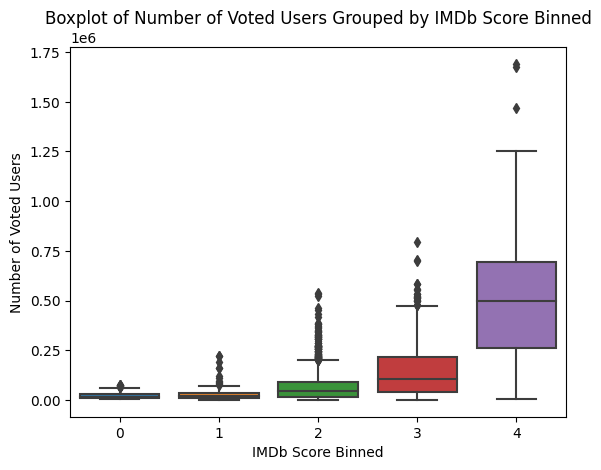

In [445]:
import seaborn as sns
import matplotlib.pyplot as plt

new_df = pd.concat([X_smote, y_smote], axis=1)

sns.boxplot(x='imdb_score_binned', y='num_voted_users', data=new_df)
plt.xlabel('IMDb Score Binned')
plt.ylabel('Number of Voted Users')
plt.title('Boxplot of Number of Voted Users Grouped by IMDb Score Binned')
plt.show()

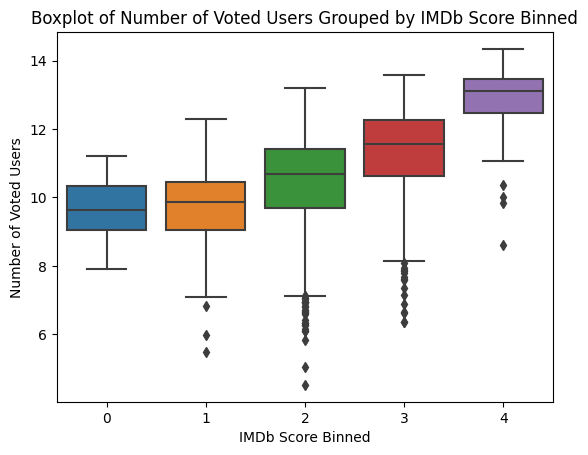

In [446]:
new_df['num_voted_users_logged'] = new_df['num_voted_users'].apply(np.log1p)

sns.boxplot(x='imdb_score_binned', y='num_voted_users_logged', data=new_df)
plt.xlabel('IMDb Score Binned')
plt.ylabel('Number of Voted Users')
plt.title('Boxplot of Number of Voted Users Grouped by IMDb Score Binned')
plt.show()

In [381]:
X_smote.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'gross', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster', 'title_year',
       'actor_2_facebook_likes', 'average_degree_centrality', 'English', 'USA',
       'UK', 'G', 'R', 'PG-13', 'Unrated', 'PG', 'NC-17',
       'director_degree_centrality', 'genre_cluster', 'plot_keywords_cluster',
       'title_cluster'],
      dtype='object')

In [382]:
X_smote_linear = X_smote.copy()
X_test_linear = test_X_joined_total.copy()
X_holdout_linear = X_holdout.copy()

X_smote_linear[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'cast_total_facebook_likes', 'gross',
       'num_voted_users', 'facenumber_in_poster', 'title_year',
       'actor_2_facebook_likes']] = np.log1p(X_smote_linear[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'cast_total_facebook_likes', 'gross',
       'num_voted_users', 'facenumber_in_poster', 'title_year',
       'actor_2_facebook_likes']])

X_test_linear[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'cast_total_facebook_likes', 'gross',
       'num_voted_users', 'facenumber_in_poster', 'title_year',
       'actor_2_facebook_likes']] = np.log1p(X_test_linear[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'cast_total_facebook_likes', 'gross',
       'num_voted_users', 'facenumber_in_poster', 'title_year',
       'actor_2_facebook_likes']])

X_holdout_linear[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'cast_total_facebook_likes', 'gross',
       'num_voted_users', 'facenumber_in_poster', 'title_year',
       'actor_2_facebook_likes']] = np.log1p(X_holdout_linear[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'cast_total_facebook_likes', 'gross',
       'num_voted_users', 'facenumber_in_poster', 'title_year',
       'actor_2_facebook_likes']])

I will also scale the degree centrality. I know this isn't linear, but I will first multiply it by 3000 (essentially back to the number of films in the trianing set) so that taking the log makes sense

In [383]:
X_smote_linear[['average_degree_centrality', 'director_degree_centrality']] = 3000 * (X_smote_linear[['average_degree_centrality', 'director_degree_centrality']])
X_test_linear[['average_degree_centrality', 'director_degree_centrality']] = 3000 * (X_test_linear[['average_degree_centrality', 'director_degree_centrality']])


In [384]:
X_holdout_linear[['average_degree_centrality', 'director_degree_centrality']] = 3000 * (X_holdout_linear[['average_degree_centrality', 'director_degree_centrality']])


In [385]:
X_smote_linear[['average_degree_centrality', 'director_degree_centrality']] = np.log1p(X_smote_linear[['average_degree_centrality', 'director_degree_centrality']])
X_test_linear[['average_degree_centrality', 'director_degree_centrality']] = np.log1p(X_test_linear[['average_degree_centrality', 'director_degree_centrality']])

In [386]:
X_holdout_linear[['average_degree_centrality', 'director_degree_centrality']] = np.log1p(X_holdout_linear[['average_degree_centrality', 'director_degree_centrality']])

In [387]:
X_smote_linear = X_smote_linear.drop(columns = ['genre_cluster', 'plot_keywords_cluster', 'title_cluster'])
X_test_linear = X_test_linear.drop(columns = ['genre_cluster', 'plot_keywords_cluster', 'title_cluster'])

In [388]:
X_holdout_linear = X_holdout_linear.drop(columns = ['genre_cluster', 'plot_keywords_cluster', 'title_cluster'])

Scale it too based on sklearn recommendation

In [389]:
scaler = StandardScaler()

X_smote_linear = scaler.fit_transform(X_smote_linear)
X_test_linear = scaler.transform(X_test_linear)

In [390]:
X_holdout_linear = scaler.transform(X_holdout_linear)

In [369]:
from sklearn.svm import SVC

### Model 3: Linear SVM ###

Now the data is ready for linear SVM

In [372]:
clf = SVC()

pamater_grid = {'kernel': ['linear'], 'max_iter': [500000], 'class_weight': [None], 'C':[0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]}
grid = GridSearchCV(clf, pamater_grid, verbose=3)
grid.fit(X_smote_linear, y_smote)

print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END C=0.8, class_weight=None, kernel=linear, max_iter=500000;, score=0.686 total time=   0.1s
[CV 2/5] END C=0.8, class_weight=None, kernel=linear, max_iter=500000;, score=0.704 total time=   0.1s
[CV 3/5] END C=0.8, class_weight=None, kernel=linear, max_iter=500000;, score=0.706 total time=   0.1s
[CV 4/5] END C=0.8, class_weight=None, kernel=linear, max_iter=500000;, score=0.688 total time=   0.1s
[CV 5/5] END C=0.8, class_weight=None, kernel=linear, max_iter=500000;, score=0.672 total time=   0.1s
[CV 1/5] END C=0.9, class_weight=None, kernel=linear, max_iter=500000;, score=0.686 total time=   0.1s
[CV 2/5] END C=0.9, class_weight=None, kernel=linear, max_iter=500000;, score=0.704 total time=   0.1s
[CV 3/5] END C=0.9, class_weight=None, kernel=linear, max_iter=500000;, score=0.706 total time=   0.1s
[CV 4/5] END C=0.9, class_weight=None, kernel=linear, max_iter=500000;, score=0.688 total time=   0.1s
[CV 5/5] END 

Nice - now we just gotta evaluate it to see if it makes any different results from the others

In [447]:
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_smote_linear, y_smote, test_size=0.3, random_state=99)
clf = SVC(C=0.9, class_weight=None, kernel='linear', max_iter=500000)
clf.fit(X_train_linear, y_train_linear)
predictions = clf.predict(X_test_linear)
print(classification_report(y_test_linear, predictions))

              precision    recall  f1-score   support

           0       1.00      0.41      0.58        32
           1       0.00      0.00      0.00        52
           2       0.70      0.91      0.79       438
           3       0.64      0.47      0.54       195
           4       0.89      0.55      0.68        29

    accuracy                           0.70       746
   macro avg       0.65      0.47      0.52       746
weighted avg       0.65      0.70      0.66       746



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,


train

In [448]:
predictions = clf.predict(X_train_linear)
print(classification_report(y_train_linear, predictions))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71        67
           1       0.00      0.00      0.00       137
           2       0.71      0.91      0.80      1020
           3       0.66      0.49      0.56       445
           4       0.96      0.61      0.75        70

    accuracy                           0.71      1739
   macro avg       0.66      0.51      0.56      1739
weighted avg       0.66      0.71      0.67      1739



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,


holdout

In [449]:
predictions = clf.predict(X_holdout_linear)
print(classification_report(y_holdout, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        46
           2       0.73      0.92      0.81       381
           3       0.57      0.40      0.47       137
           4       0.79      0.50      0.61        30

    accuracy                           0.70       601
   macro avg       0.42      0.37      0.38       601
weighted avg       0.63      0.70      0.65       601



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,


### Model 4: Logistic Regression ###

The data is already ready to go, we can use the SAME as SVM, also a linear model for this. Also, it performs good with scaled data too

In [392]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

pamater_grid = {'penalty': ['l2'], 'max_iter': [10000], 'dual':[False], 'C':[0.1, 0.5, 1, 2, 5], 'class_weight': ['balanced', None], 'multi_class': ['ovr', 'multinomial']}
grid = GridSearchCV(clf, pamater_grid, verbose=3)
grid.fit(X_smote_linear, y_smote)

print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=0.1, class_weight=balanced, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.563 total time=   0.6s
[CV 2/5] END C=0.1, class_weight=balanced, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.588 total time=   0.3s
[CV 3/5] END C=0.1, class_weight=balanced, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.567 total time=   0.3s
[CV 4/5] END C=0.1, class_weight=balanced, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.565 total time=   0.3s
[CV 5/5] END C=0.1, class_weight=balanced, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.553 total time=   0.3s
[CV 1/5] END C=0.1, class_weight=balanced, dual=False, max_iter=10000, multi_class=multinomial, penalty=l2;, score=0.515 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, dual=False, max_iter=10000, multi_class=multinomial, penalty=l2;, score=0.507 total time=   0.0

In [394]:
pamater_grid = {'penalty': ['l2'], 'max_iter': [10000], 'dual':[False], 'C':[3, 4, 5, 6, 7, 10, 30], 'class_weight': [None], 'multi_class': ['ovr', 'multinomial']}
grid = GridSearchCV(clf, pamater_grid, verbose=3)
grid.fit(X_smote_linear, y_smote)

print(f"best cv score: {grid.best_score_}, with parameters {grid.best_params_}")

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END C=3, class_weight=None, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.680 total time=   0.6s
[CV 2/5] END C=3, class_weight=None, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.698 total time=   0.5s
[CV 3/5] END C=3, class_weight=None, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.702 total time=   0.3s
[CV 4/5] END C=3, class_weight=None, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.664 total time=   0.4s
[CV 5/5] END C=3, class_weight=None, dual=False, max_iter=10000, multi_class=ovr, penalty=l2;, score=0.672 total time=   0.3s
[CV 1/5] END C=3, class_weight=None, dual=False, max_iter=10000, multi_class=multinomial, penalty=l2;, score=0.684 total time=   0.1s
[CV 2/5] END C=3, class_weight=None, dual=False, max_iter=10000, multi_class=multinomial, penalty=l2;, score=0.698 total time=   0.1s
[CV 3/5] END C=3, class_weight=None, dual

In [397]:
clf = LogisticRegression(C=7, dual=False, max_iter=10000, multi_class='multinomial', penalty = 'l2')
clf.fit(X_train_linear, y_train_linear)
predictions = clf.predict(X_test_linear)
print(classification_report(y_test_linear, predictions))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62        32
           1       0.25      0.02      0.04        52
           2       0.70      0.90      0.79       438
           3       0.64      0.45      0.53       195
           4       0.78      0.72      0.75        29

    accuracy                           0.69       746
   macro avg       0.63      0.52      0.54       746
weighted avg       0.66      0.69      0.66       746



train

In [398]:
predictions = clf.predict(X_train_linear)
print(classification_report(y_train_linear, predictions))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80        67
           1       0.31      0.04      0.07       137
           2       0.71      0.90      0.79      1020
           3       0.65      0.49      0.55       445
           4       0.89      0.67      0.76        70

    accuracy                           0.71      1739
   macro avg       0.70      0.56      0.60      1739
weighted avg       0.68      0.71      0.67      1739



holdout

In [399]:
predictions = clf.predict(X_holdout_linear)
print(classification_report(y_holdout, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        46
           2       0.73      0.90      0.81       381
           3       0.55      0.38      0.45       137
           4       0.74      0.67      0.70        30

    accuracy                           0.69       601
   macro avg       0.40      0.39      0.39       601
weighted avg       0.63      0.69      0.65       601



### Visualisation for the report ###
This visualisation is to help for hyperparameter tuning. It is just a single example, because we can't do it for literally every hyperparameter in our models

Classification report for C=100:
              precision    recall  f1-score   support

           0       0.88      0.44      0.58        32
           1       0.00      0.00      0.00        52
           2       0.69      0.95      0.80       438
           3       0.69      0.37      0.48       195
           4       0.83      0.66      0.73        29

    accuracy                           0.70       746
   macro avg       0.62      0.48      0.52       746
weighted avg       0.66      0.70      0.65       746



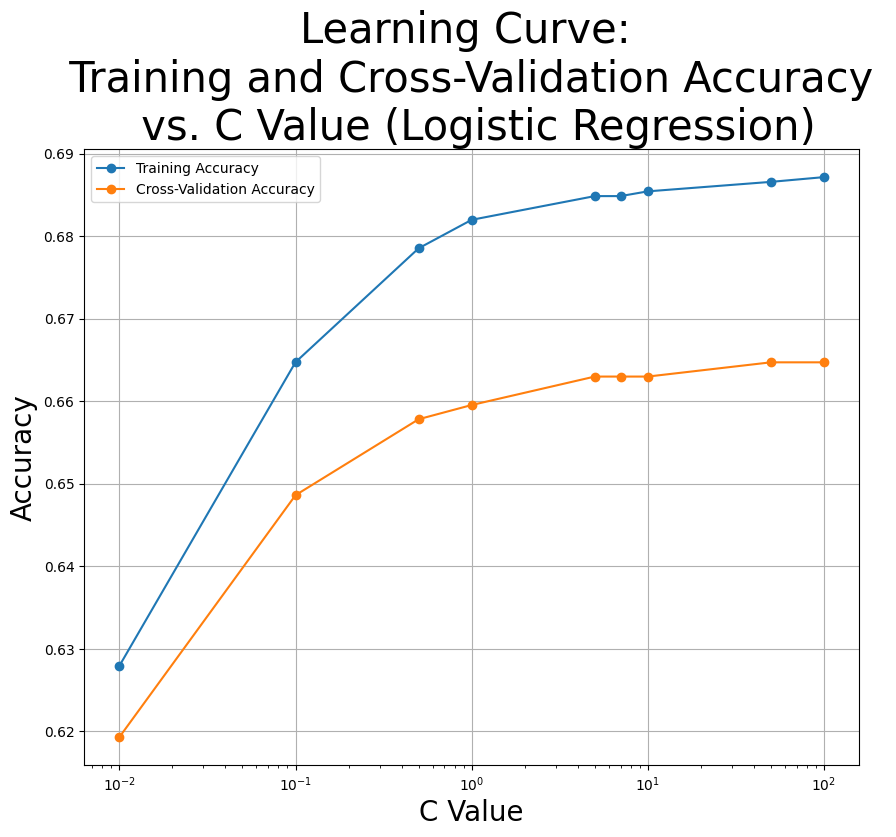

In [460]:

X_train, X_test, y_train, y_test = train_test_split(X_smote_linear, y_smote, test_size=0.3, random_state=99)

C_values = [0.01, 0.1, 0.5, 1, 5, 7, 10, 50, 100]

train_accuracies = []
cv_accuracies = []

for C in C_values:
    clf = LogisticRegression(C=C, dual=False, max_iter=10000, multi_class='ovr')

    clf.fit(X_train, y_train)

    train_predictions = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_accuracies.append(train_accuracy)
    
    cv_accuracy = np.mean(cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy'))
    cv_accuracies.append(cv_accuracy)

print(f"Classification report for C={C_values[-1]}:")
test_predictions = clf.predict(X_test)
print(classification_report(y_test, test_predictions))

plt.figure(figsize=(10, 8))
plt.plot(C_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(C_values, cv_accuracies, label='Cross-Validation Accuracy', marker='o')
plt.xlabel('C Value', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.title('Learning Curve: \n Training and Cross-Validation Accuracy \n vs. C Value (Logistic Regression)', fontsize=30)
plt.legend()
plt.xscale('log') 
plt.grid(True)
plt.show()


### ENSEMBLE STACKED MODEL ###

First I'll apply all the preprocessing steps necessary, then create a stacked model with these pipelines

The final stacked model will be a NEURAL NETWORK - A MultiLayerPerceptron

In [401]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.neighbors import KNeighborsClassifier

In [419]:
# firstly RF - nice already easy!
pipelineRF = Pipeline([
    ('classifier', RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=20, max_features=20, n_estimators=100))
])

In [420]:
# knn
columns_to_drop = ['genre_cluster', 'plot_keywords_cluster', 'title_cluster']

preprocessor_knn = ColumnTransformer(
    transformers=[
        ('drop', 'drop', columns_to_drop)
    ],
    remainder='passthrough'
)

pipelineKNN = Pipeline([
    ('preprocessor', preprocessor_knn),
    ('scale', StandardScaler()),
    ('classifier', KNeighborsClassifier(weights='distance', n_neighbors=20))
])

In [421]:
# svm
feature_selector = SelectKBest(score_func=mutual_info_classif, k=20)

columns_to_drop = ['genre_cluster', 'plot_keywords_cluster', 'title_cluster']

columns_to_multiply = ['average_degree_centrality', 'director_degree_centrality']

columns_to_log = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'cast_total_facebook_likes', 'gross',
       'num_voted_users', 'facenumber_in_poster', 'title_year',
       'actor_2_facebook_likes', 'average_degree_centrality', 'director_degree_centrality']

def mult3000(X):
    return 3000 * X

log1p_transformer = FunctionTransformer(np.log1p)
mult3000_transformer = FunctionTransformer(mult3000)


preprocessor_svm = ColumnTransformer(
    transformers=[
        ('drop', 'drop', columns_to_drop),
        ('mult3000', mult3000_transformer, columns_to_multiply),
        ('log1p', log1p_transformer, columns_to_log)
    ],
    remainder='passthrough'
)

pipelineSVM = Pipeline([
    ('preprocessor', preprocessor_svm),
    ('scale', StandardScaler()),
    ('classifier', SVC(C=1.1, class_weight=None, kernel='linear', max_iter=-1))
])

In [422]:
# logistic regression
feature_selector = SelectKBest(score_func=mutual_info_classif, k=20)

columns_to_drop = ['genre_cluster', 'plot_keywords_cluster', 'title_cluster']

columns_to_multiply = ['average_degree_centrality', 'director_degree_centrality']

columns_to_log = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'cast_total_facebook_likes', 'gross',
       'num_voted_users', 'facenumber_in_poster', 'title_year',
       'actor_2_facebook_likes', 'average_degree_centrality', 'director_degree_centrality']

def mult3000(X):
    return 3000 * X

log1p_transformer = FunctionTransformer(np.log1p)
mult3000_transformer = FunctionTransformer(mult3000)


preprocessor_lr = ColumnTransformer(
    transformers=[
        ('drop', 'drop', columns_to_drop),
        ('mult3000', mult3000_transformer, columns_to_multiply),
        ('log1p', log1p_transformer, columns_to_log)
    ],
    remainder='passthrough'
)

pipeline_lr = Pipeline([
    ('preprocessor', preprocessor_lr),
    ('classifier', LogisticRegression(C=5, dual=False, max_iter=10000, multi_class='ovr'))
])

In [423]:
def create_csv(predictions, name):
    pred_df = pd.DataFrame(predictions, columns=['imdb_score_binned'])
    pred_df.index = pd.RangeIndex(start=1, stop=len(predictions)+ 1, step=1)
    pred_df.to_csv(f'{name}_predictions.csv', index=True, index_label='id')

In [424]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from scikeras.wrappers import KerasClassifier

from tensorflow.keras.callbacks import EarlyStopping # I'll use this to prevent overfitting
from tensorflow.keras.regularizers import l2 # I'll use l2 regularisation to penalise large weights

from sklearn.utils.class_weight import compute_class_weight # to adjust the weights of classes when predicting

In [425]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [426]:
def create_nn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.005)))
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [427]:
input_shape = (4*5,) # 4 models, 5 predictions
nn_model = KerasClassifier(model=lambda: create_nn_model(input_shape), epochs=100, batch_size=10, verbose=0, validation_split=0.2, callbacks=[early_stopping]) # validation split - when the val_loss stops improving we stop and return 


In [428]:

stacked_model = StackingClassifier(
    estimators=[
        ('RandomForest', pipelineRF),
        ('KNN', pipelineKNN),
        ('SVM', pipelineSVM),
        ('LogisticReg', pipeline_lr)
    ],
    final_estimator=nn_model,
    stack_method='auto',
    passthrough=False,
    cv=5
)

In [431]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=99)

In [432]:
stacked_model.fit(X_train_smote, y_train_smote)

StackingClassifier(cv=5,
                   estimators=[('RandomForest',
                                Pipeline(steps=[('classifier',
                                                 RandomForestClassifier(class_weight='balanced',
                                                                        criterion='entropy',
                                                                        max_depth=20,
                                                                        max_features=20))])),
                               ('KNN',
                                Pipeline(steps=[('preprocessor',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('drop',
                                                                                  'drop',
                                                                                  ['genre_cluster',
                                                                                   'plot_keywords_cluster',
                                                                                   'title_cluster']...
                                                                                   'actor_2_facebook_likes',
                                                                                   'average_degree_centrality',
                                                                                   'director_degree_centrality'])])),
                                                ('classifier',
                                                 LogisticRegression(C=5,
                                                                    max_iter=10000,
                                                                    multi_class='ovr'))]))],
                   final_estimator=KerasClassifier(batch_size=10, callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x2ffa12950>], epochs=100, model=<function <lambda> at 0x2d31d3e20>, validation_split=0.2, verbose=0))

train

In [433]:
predictions = stacked_model.predict(X_train_smote)
print(classification_report(y_train_smote, predictions))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        67
           1       0.00      0.00      0.00       137
           2       0.80      0.97      0.88      1020
           3       0.88      0.77      0.82       445
           4       0.94      0.83      0.88        70

    accuracy                           0.83      1739
   macro avg       0.72      0.69      0.70      1739
weighted avg       0.77      0.83      0.80      1739



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,


test smote

In [434]:
predictions = stacked_model.predict(X_test_smote)
print(classification_report(y_test_smote, predictions))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79        32
           1       0.00      0.00      0.00        52
           2       0.72      0.91      0.80       438
           3       0.66      0.50      0.57       195
           4       0.86      0.66      0.75        29

    accuracy                           0.72       746
   macro avg       0.65      0.54      0.58       746
weighted avg       0.67      0.72      0.68       746



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,


test holdout

In [435]:
predictions = stacked_model.predict(X_holdout)
print(classification_report(y_holdout, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        46
           2       0.74      0.93      0.82       381
           3       0.60      0.43      0.50       137
           4       0.76      0.53      0.63        30

    accuracy                           0.71       601
   macro avg       0.42      0.38      0.39       601
weighted avg       0.64      0.71      0.67       601



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  average=average,


### All models results visualisation ###

Now to plot the accuracies against each other of ALL the models

In [450]:
rf_accuracies = {'training': 1.00, 'test-SMOTE': 0.72, 'test-normal': 0.74}
knn_accuracies = {'training': 1.00, 'test-SMOTE': 0.67, 'test-normal': 0.68}
svm_accuracies = {'training': 0.71, 'test-SMOTE': 0.70, 'test-normal': 0.70}
lr_accuracies = {'training': 0.71, 'test-SMOTE': 0.69, 'test-normal': 0.69}
nn_accuracies = {'training': 0.83, 'test-SMOTE': 0.72, 'test-normal': 0.71}

In [451]:
acc_data = pd.DataFrame({
    'Random Forest': rf_accuracies,
    'KNN': knn_accuracies,
    'SVM': svm_accuracies,
    'Logistic Regression': lr_accuracies,
    'Neural Network': nn_accuracies
})
acc_data = acc_data.T
acc_data


,training,test-SMOTE,test-normal
Random Forest,1.00,0.72,0.74
KNN,1.00,0.67,0.68
SVM,0.71,0.70,0.70
Logistic Regression,0.71,0.69,0.69
Neural Network,0.83,0.72,0.71


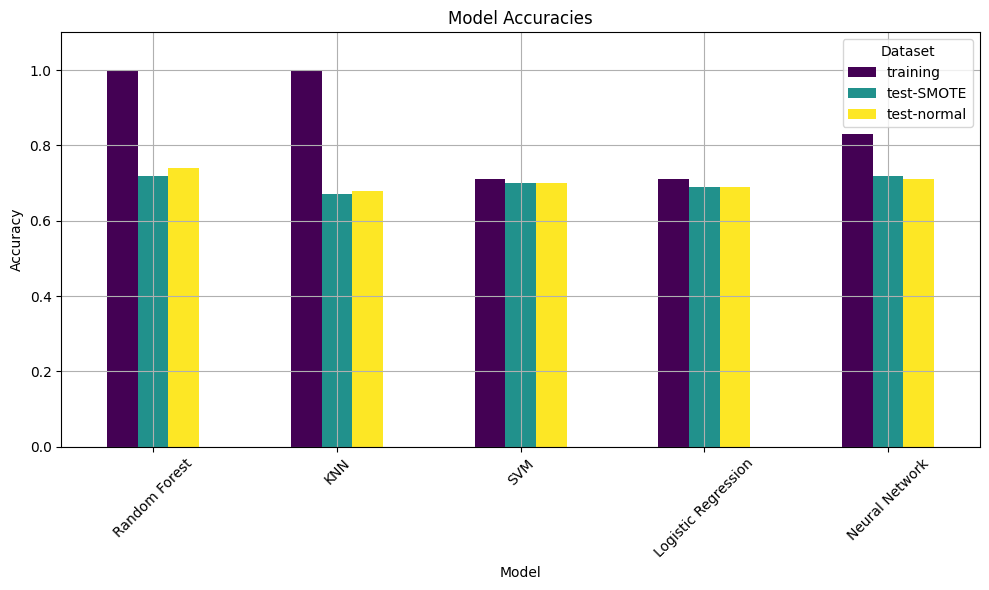

In [453]:

ax = acc_data.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.grid()
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.legend(title='Dataset', loc='upper right')
plt.tight_layout()
plt.show()